<a href="https://colab.research.google.com/github/FreMeli/ASE_1/blob/main/EDO_SEXO_LIMPIO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Vamos a cargar y leer 2 archivos:
  1. pob_ini_proyecciones.csv --> Contiene el total de la población por años. Fuente: CONAPO 
  2. INEGI_exporta_12_4_2023_8_47_22.xls --> Contiene el número de homicidios para hombres y mujeres por año y por estado. Fuente:INEGI

In [1]:
import pandas as pd
import numpy as np

from google.colab import files 
import io
upload = files.upload()

Saving INEGI_exporta_12_4_2023_8_47_22.xls to INEGI_exporta_12_4_2023_8_47_22.xls
Saving pob_ini_proyecciones.csv to pob_ini_proyecciones.csv


In [ ]:
#upload1 = files.upload()

Saving INEGI_exporta_12_4_2023_8_47_22.xls to INEGI_exporta_12_4_2023_8_47_22.xls


In [2]:
df_P=pd.read_csv(io.BytesIO(upload["pob_ini_proyecciones.csv"]), header=0, encoding="ISO-8859-1")
df_P #Para ver las primeras 10 filas

,RENGLON,AÑO,ENTIDAD,CVE_GEO,EDAD,SEXO,POBLACION
0,1,1950,República Mexicana,0,0,Hombres,564510
1,2,1950,República Mexicana,0,0,Mujeres,552054
2,3,1950,República Mexicana,0,1,Hombres,505655
3,4,1950,República Mexicana,0,1,Mujeres,496559
4,5,1950,República Mexicana,0,2,Hombres,470139
...,...,...,...,...,...,...,...
599715,599716,2051,Zacatecas,32,107,Mujeres,4
599716,599717,2051,Zacatecas,32,108,Hombres,1
599717,599718,2051,Zacatecas,32,108,Mujeres,2
599718,599719,2051,Zacatecas,32,109,Hombres,0


In [3]:
df_P.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599720 entries, 0 to 599719
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   RENGLON    599720 non-null  int64 
 1   AÑO        599720 non-null  int64 
 2   ENTIDAD    599720 non-null  object
 3   CVE_GEO    599720 non-null  int64 
 4   EDAD       599720 non-null  int64 
 5   SEXO       599720 non-null  object
 6   POBLACION  599720 non-null  int64 
dtypes: int64(5), object(2)
memory usage: 32.0+ MB


In [4]:
df_Homicidios=pd.read_excel(io.BytesIO(upload["INEGI_exporta_12_4_2023_8_47_22.xls"]), header=0)#df con los datos de homicidio
df_Homicidios.head(10) #Para ver las primeras 10 filas

,AÑO,EDO,Hombre,Mujer,Total
0,2000,Total,9442.0,1284.0,10737.0
1,2000,Aguascalientes,13.0,4.0,17.0
2,2000,Baja California,408.0,32.0,440.0
3,2000,Baja California Sur,23.0,5.0,28.0
4,2000,Campeche,60.0,5.0,66.0
5,2000,Coahuila de Zaragoza,104.0,16.0,120.0
6,2000,Colima,48.0,9.0,57.0
7,2000,Chiapas,377.0,52.0,429.0
8,2000,Chihuahua,530.0,58.0,588.0
9,2000,Ciudad de México,815.0,109.0,924.0


In [5]:
df_Homicidios

,AÑO,EDO,Hombre,Mujer,Total
0,2000,Total,9442.0,1284.0,10737.0
1,2000,Aguascalientes,13.0,4.0,17.0
2,2000,Baja California,408.0,32.0,440.0
3,2000,Baja California Sur,23.0,5.0,28.0
4,2000,Campeche,60.0,5.0,66.0
...,...,...,...,...,...
726,2021,No especificado,432.0,72.0,512.0
727,NaN,NaN,NaN,NaN,NaN
728,NaN,NaN,NaN,NaN,NaN
729,NaN,NaN,NaN,NaN,NaN


In [6]:
df_homicidios=df_Homicidios.copy()
df_homicidios.drop(columns=['Total'], inplace=True, axis=1)
df_homicidios

,AÑO,EDO,Hombre,Mujer
0,2000,Total,9442.0,1284.0
1,2000,Aguascalientes,13.0,4.0
2,2000,Baja California,408.0,32.0
3,2000,Baja California Sur,23.0,5.0
4,2000,Campeche,60.0,5.0
...,...,...,...,...
726,2021,No especificado,432.0,72.0
727,NaN,NaN,NaN,NaN
728,NaN,NaN,NaN,NaN
729,NaN,NaN,NaN,NaN


In [7]:
df_homicidios.drop(df_homicidios.index[727:732], inplace=True) #Estamos eliminado las filas del final que no nos sirven
df_homicidios.tail(5)

,AÑO,EDO,Hombre,Mujer
722,2021,Tlaxcala,131.0,29.0
723,2021,Veracruz de Ignacio de la Llave,812.0,109.0
724,2021,Yucatán,47.0,8.0
725,2021,Zacatecas,1578.0,171.0
726,2021,No especificado,432.0,72.0


In [8]:
df_homicidios.drop(df_homicidios.index[726], inplace=True) #Estamos eliminado las filas del final que no nos sirven
df_homicidios.tail(5)

,AÑO,EDO,Hombre,Mujer
721,2021,Tamaulipas,628.0,62.0
722,2021,Tlaxcala,131.0,29.0
723,2021,Veracruz de Ignacio de la Llave,812.0,109.0
724,2021,Yucatán,47.0,8.0
725,2021,Zacatecas,1578.0,171.0


In [9]:
df_homicidios.rename({'EDO': 'ENTIDAD', 'Hombre': 'HOMBRES','Mujer': 'MUJERES' }, axis=1, inplace=True)
df_homicidios

,AÑO,ENTIDAD,HOMBRES,MUJERES
0,2000,Total,9442.0,1284.0
1,2000,Aguascalientes,13.0,4.0
2,2000,Baja California,408.0,32.0
3,2000,Baja California Sur,23.0,5.0
4,2000,Campeche,60.0,5.0
...,...,...,...,...
721,2021,Tamaulipas,628.0,62.0
722,2021,Tlaxcala,131.0,29.0
723,2021,Veracruz de Ignacio de la Llave,812.0,109.0
724,2021,Yucatán,47.0,8.0


In [ ]:
df_homicidios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 726 entries, 0 to 725
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AÑO     726 non-null    object 
 1   EDO     726 non-null    object 
 2   Hombre  726 non-null    float64
 3   Mujer   726 non-null    float64
dtypes: float64(2), object(2)
memory usage: 22.8+ KB


In [ ]:
df_homicidios.shape

(726, 4)

In [10]:
df_homicidios.to_excel('df_homicidios.xlsx', sheet_name='homicidios') #guardamos el df en un archivo tipo excel

In [11]:
df_homicidios.to_csv('df_homicidios.csv')

**NOTAS:**

    *df_Homicidios: INEGI con columna Total

    *df_homicidios: INEGI sin la colimuna Total

##Vamos a ordenar el df_P para poderlo usar


In [12]:
#Creamos un df_P1 que tendrá los datos desde el añoo 2000 hasta el 2021
df_P1 = df_P[df_P["AÑO"] >= 2000] 
df_P1 = df_P1[df_P1["AÑO"] <= 2021]
df_P1

,RENGLON,AÑO,ENTIDAD,CVE_GEO,EDAD,SEXO,POBLACION
11000,11001,2000,República Mexicana,0,0,Hombres,1161986
11001,11002,2000,República Mexicana,0,0,Mujeres,1120877
11002,11003,2000,República Mexicana,0,1,Hombres,1162710
11003,11004,2000,República Mexicana,0,1,Mujeres,1119109
11004,11005,2000,República Mexicana,0,2,Hombres,1165350
...,...,...,...,...,...,...,...
593115,593116,2021,Zacatecas,32,107,Mujeres,1
593116,593117,2021,Zacatecas,32,108,Hombres,0
593117,593118,2021,Zacatecas,32,108,Mujeres,0
593118,593119,2021,Zacatecas,32,109,Hombres,0


In [13]:
columns = ["AÑO", "ENTIDAD", "HOMBRES", "MUJERES"] #Serán el nombre de nuestars columnas
mtrx = [] #Creamos una matriz vacía

for ano in df_P1["AÑO"].unique(): #Vamos a filtrar por año usando unique
  values_ano = df_P1[df_P1["AÑO"] == ano] 
  for estado in values_ano["ENTIDAD"].unique(): #Vamos a filtrar por estado usando unique
    tmp = [] #Este temporal nos irá guardando unen una lista los datos para ir formando un arreglo
    tmp.append(ano) #Añadimos al tmp el año, el primer elemento del tmp será el año
    tmp.append(estado)  #Añadimos al tmp el estado, el segundo elemento del tmp será el estado
    values_ano_entidad = values_ano[values_ano["ENTIDAD"] == estado]
    for sexo in values_ano_entidad["SEXO"].unique(): #Vamos a filtrar por estado usando unique
      #print("Analizando a: " + sexo + "...")
      values_ano_entidad_sexo = values_ano_entidad[values_ano_entidad["SEXO"] == sexo]
      poblacion = values_ano_entidad_sexo["POBLACION"].sum()#Sumamos para tener el total de la población de cada sexo
      tmp.append(poblacion)#Añadimos al tmp el sexo, el tercer elemento del tmp será Hombres y el cuarto Mujeres
    mtrx.append(tmp)#A la matriz le añadimos el arreglo. Ahora el ciclo se repetira para el siguiente año

array = np.array(mtrx) #Hacemos un array tipo numpy para después poderlo convertir en df
#df_Pob tendrá los datos del total de la población por sexo en el mismo orden que los datos del INEGI
df_Pob = pd.DataFrame(data = array, columns = columns) 
df_Pob


,AÑO,ENTIDAD,HOMBRES,MUJERES
0,2000,República Mexicana,48255807,49900635
1,2000,Aguascalientes,464024,488559
2,2000,Baja California,1247252,1211307
3,2000,Baja California Sur,219018,207555
4,2000,Campeche,350339,347621
...,...,...,...,...
721,2021,Tamaulipas,1812500,1852763
722,2021,Tlaxcala,676446,711366
723,2021,Veracruz,4156871,4408019
724,2021,Yucatán,1118236,1153344


In [14]:
df_Pob.to_excel('CONAPO_POB.xlsx', sheet_name='POBLACION') #guardamos el df en un archivo tipo excel

In [15]:
df_Pob.to_csv('CONAPO_POB.csv')

##Ahora vamos a juntar los dataframes en uno solo llamado df

In [16]:
df = df_homicidios.copy()
df=df.append(df_Pob, ignore_index=True )
df

<ipython-input-16-4b0024770edb>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df_Pob, ignore_index=True )


,AÑO,ENTIDAD,HOMBRES,MUJERES
0,2000,Total,9442.0,1284.0
1,2000,Aguascalientes,13.0,4.0
2,2000,Baja California,408.0,32.0
3,2000,Baja California Sur,23.0,5.0
4,2000,Campeche,60.0,5.0
...,...,...,...,...
1447,2021,Tamaulipas,1812500,1852763
1448,2021,Tlaxcala,676446,711366
1449,2021,Veracruz,4156871,4408019
1450,2021,Yucatán,1118236,1153344


In [ ]:
df.to_csv('df_edo_sexo.csv') #guardamos el df en un archivo tipo excel

In [ ]:
df.to_excel('df_edo_sexo.xlsx', sheet_name='df_edo_sexo') #guardamos el df en un archivo tipo excel

##VAMOS A CALCULAR LA TASA NACIONAL DE HOMICIDIOS

Tasa x 100,000 habitantes= (No. Total de homicidios/Población total)*100,000

In [ ]:
df_Pob.iloc[0]['HOMBRES']

'48255807'

In [ ]:
df_Pob.iloc[66]

AÑO                      2002
ENTIDAD    República Mexicana
HOMBRES              49470707
MUJERES              51325800
Name: 66, dtype: object

In [ ]:
Homicidios_H=[]
Homicidios_M=[]
tasas_H=[]
tasas_M=[]
for i in range(0,len(df_homicidios),33):
  Homicidios_H.append(df.iloc[i]['HOMBRES'])
  Homicidios_M.append(df.iloc[i]['MUJERES'])
  tasas_H.append( (df.iloc[i]['HOMBRES']/float(df_Pob.iloc[i]['HOMBRES']) )*100000 )
  tasas_M.append((df.iloc[i]['MUJERES']/float(df_Pob.iloc[i]['MUJERES']))*100000)

In [ ]:
import matplotlib.pyplot as plt

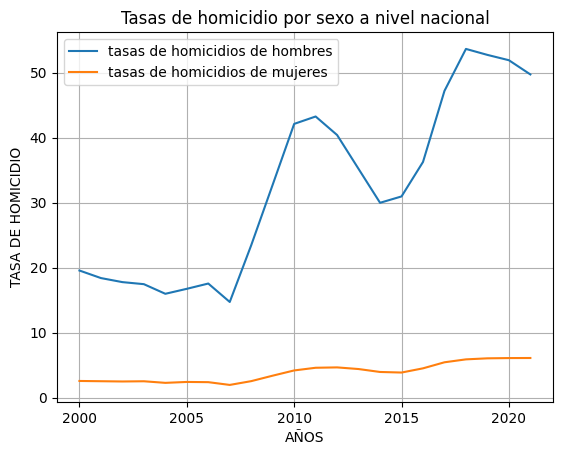

In [ ]:
years=list(range(2000, 2022))
plt.plot(years,tasas_H, label='Tasas de homicidios de hombres')
plt.plot(years, tasas_M, label='Tasas de homicidios de mujeres')
plt.xlabel('AÑOS')#Nombre del eje
plt.ylabel('TASA DE HOMICIDIO')
plt.title('Tasas de homicidio por sexo a nivel nacional') #Título del gráfico
plt.grid(True) #Para que se marquen los cuadritos
plt.legend() #Para que se visualicen las labels que establecimos arriba

In [ ]:
Estados_Ho=[]
Estados_Mu=[]
tasas_Ho=[]
tasas_Mu=[]

for edos in range (1, 32,1):
  temp_Ho=[]
  temp_Mu=[]
  for i in range(1,len(df_homicidios),33):
    tasas_Ho.append( (df.iloc[i]['HOMBRES']/float(df_Pob.iloc[i]['HOMBRES']) )*100000 )
    tasas_Mu.append((df.iloc[i]['MUJERES']/float(df_Pob.iloc[i]['MUJERES']))*100000)
  temp_Ho.append(tasas_Ho)
  temp_Mu.append(tasas_Mu)
  Estados_Ho.append(temp_Ho)
  Estados_Mu.append(temp_Mu)
  temp_Ho=[]
  Estados_Ho=[]
  temp_Mu=[]
  Estados_Mu=[]
  